   Customer_Age  Annual_Income  Has_Credit_Card  Spending_Score  \
0      4.991989      16.561790                1        8.691291   
1      2.165792      13.822373                0        6.979918   
2      8.726259      12.817916                1        7.107498   
3      0.871093      17.219831                1        6.424954   
4      4.873844      18.618751                0        6.292903   

   Loyalty_Status  
0               1  
1               1  
2               1  
3               1  
4               1  
              precision    recall  f1-score   support

           0       0.54      0.60      0.57       207
           1       0.51      0.46      0.48       193

    accuracy                           0.53       400
   macro avg       0.53      0.53      0.53       400
weighted avg       0.53      0.53      0.53       400



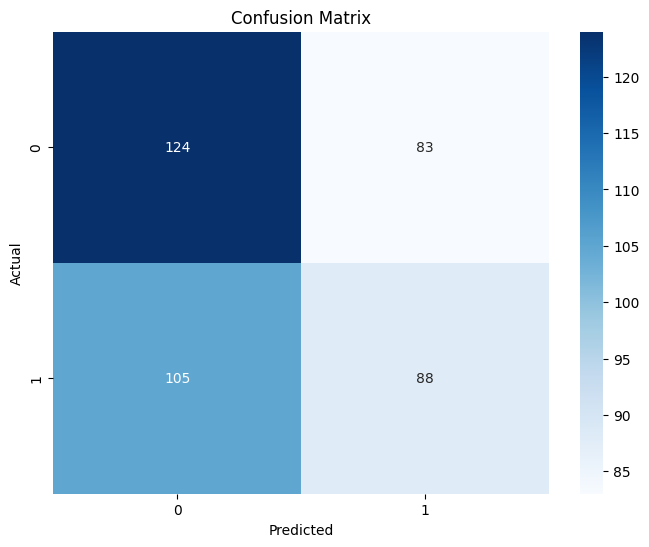

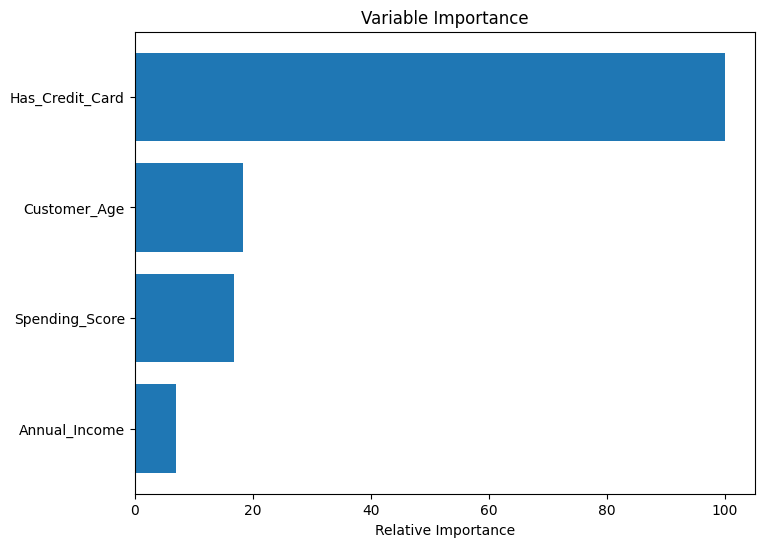

Most impactful variables:
Has_Credit_Card 100.0
Customer_Age 18.441417410883073
Spending_Score 16.780766733821
Annual_Income 6.938859934990186


In [5]:
# load /content/customer_loyalty.csv

import pandas as pd
df = pd.read_csv('/content/customer_loyalty.csv')
print(df.head())


# Run an SVM to classify Loyalty_Status. The predictor variables are Customer_Age, Annual_Income, Has_Credit_Card, Spending_Score. Include a summary table of the model output. Include a chart of the confusion matrix. Include a list of the most impactful variables.

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
X = df[['Customer_Age', 'Annual_Income', 'Has_Credit_Card', 'Spending_Score']]
y = df['Loyalty_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the SVM model
svm_model = SVC(kernel='linear')  # You can experiment with different kernels
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Model evaluation
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=svm_model.classes_, yticklabels=svm_model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Feature Importance (for linear kernel)
if svm_model.kernel == 'linear':
    feature_importance = abs(svm_model.coef_[0])
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = feature_importance.argsort()
    pos = np.arange(sorted_idx.shape[0]) + .5
    plt.figure(figsize=(8,6))
    plt.barh(pos, feature_importance[sorted_idx], align='center')
    plt.yticks(pos, X.columns[sorted_idx])
    plt.xlabel('Relative Importance')
    plt.title('Variable Importance')
    plt.show()
    print("Most impactful variables:")
    for i in sorted_idx[::-1]:
        print(X.columns[i], feature_importance[i])
else:
    print("Feature importance is not directly available for non-linear kernels.")
